### AI Adoption Analysis Acrross Various Sectors and Countries

 the influence of AI-generated content across various industries, including journalism, social media, entertainment, and marketing. It provides insights into public sentiment, engagement trends, economic impact, and regulatory responses over time.

 Dataset: https://www.kaggle.com/datasets/atharvasoundankar/impact-of-ai-on-digital-media-2020-2025
 

In [1]:
# Required imports:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'Global_AI_Content_Impact_Dataset.csv'


In [324]:
# Load the dataset
df = pd.read_csv(data_path)


### Visualizing Missing Values per Column on a Heatmap

Text(0.5, 1.0, 'Missing Values in Dataset')

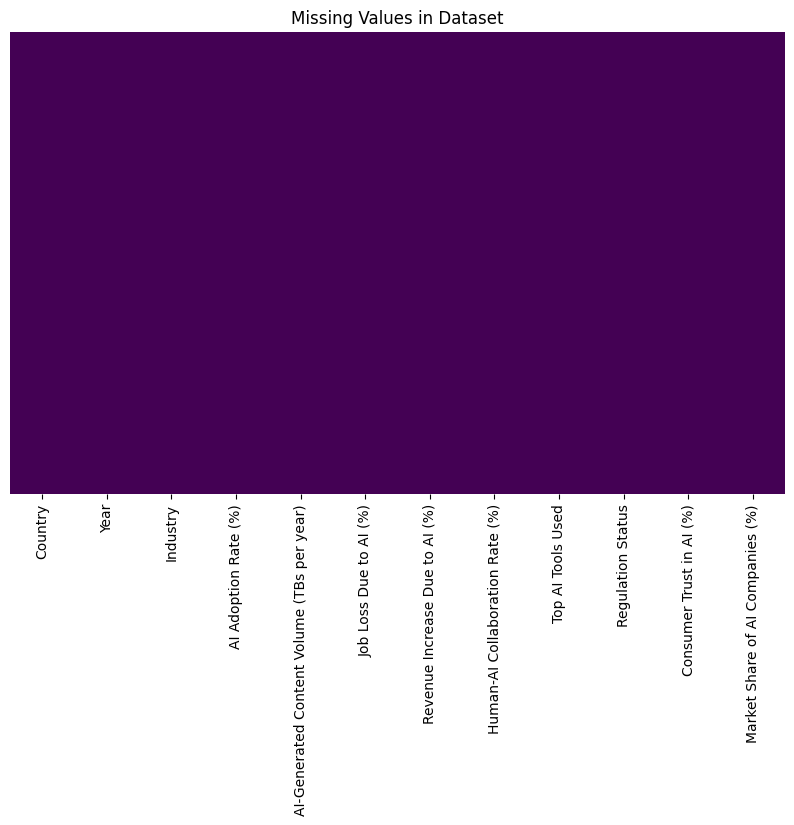

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Dataset')
# The heatmap shows that there are no missing values in the dataset

### Data Snapshot of the first 10 entries

In [103]:
df.head(10)

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
5,USA,2021,Retail,66.95,47.72,0.86,27.58,64.42,ChatGPT,Lenient,68.14,8.09
6,Australia,2023,Media,68.23,6.14,6.20,53.13,53.16,Claude,Moderate,71.60,15.26
7,UK,2023,Gaming,91.27,33.87,41.67,56.26,59.93,ChatGPT,Moderate,46.98,28.51
8,Canada,2025,Education,17.02,87.77,4.59,52.45,64.72,Claude,Moderate,60.55,22.70
9,China,2025,Healthcare,25.50,18.74,15.07,40.81,64.86,Stable Diffusion,Moderate,51.07,39.97


### Columns and DataTypes Exploration (Categorical, DateTime, and Numeric Values)

In [114]:
# categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for cat_col in cat_cols:
    print(f"Unique values in {cat_col}: {df[cat_col].unique()}")
    print(f"Number of unique values in {cat_col}: {df[cat_col].nunique()}")
    print("\n")

Unique values in Country: ['South Korea' 'China' 'USA' 'France' 'Australia' 'UK' 'Canada' 'India'
 'Japan' 'Germany']
Number of unique values in Country: 10


Unique values in Industry: ['Media' 'Legal' 'Automotive' 'Gaming' 'Retail' 'Education' 'Healthcare'
 'Marketing' 'Manufacturing' 'Finance']
Number of unique values in Industry: 10


Unique values in Top AI Tools Used: ['Bard' 'DALL-E' 'Stable Diffusion' 'Claude' 'Midjourney' 'ChatGPT'
 'Synthesia']
Number of unique values in Top AI Tools Used: 7


Unique values in Regulation Status: ['Strict' 'Moderate' 'Lenient']
Number of unique values in Regulation Status: 3




### Popular AI Tools Accross Countries and Industries

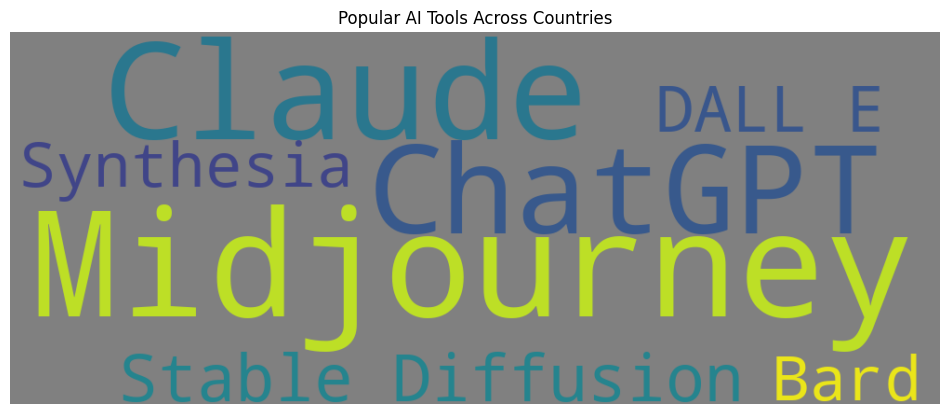

In [323]:
import wordcloud
from wordcloud import WordCloud

tools_text = ' '.join(df['Top AI Tools Used'].dropna().astype(str)) 
wordcloud = WordCloud(width=1000, height=400, background_color='gray').generate(tools_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular AI Tools Across Countries")
plt.show()

### Average AI Adoption Rate by Country

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\1326456842.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI Adoption Rate (%)', y='Country', data=country_ai_adoption, palette='viridis')


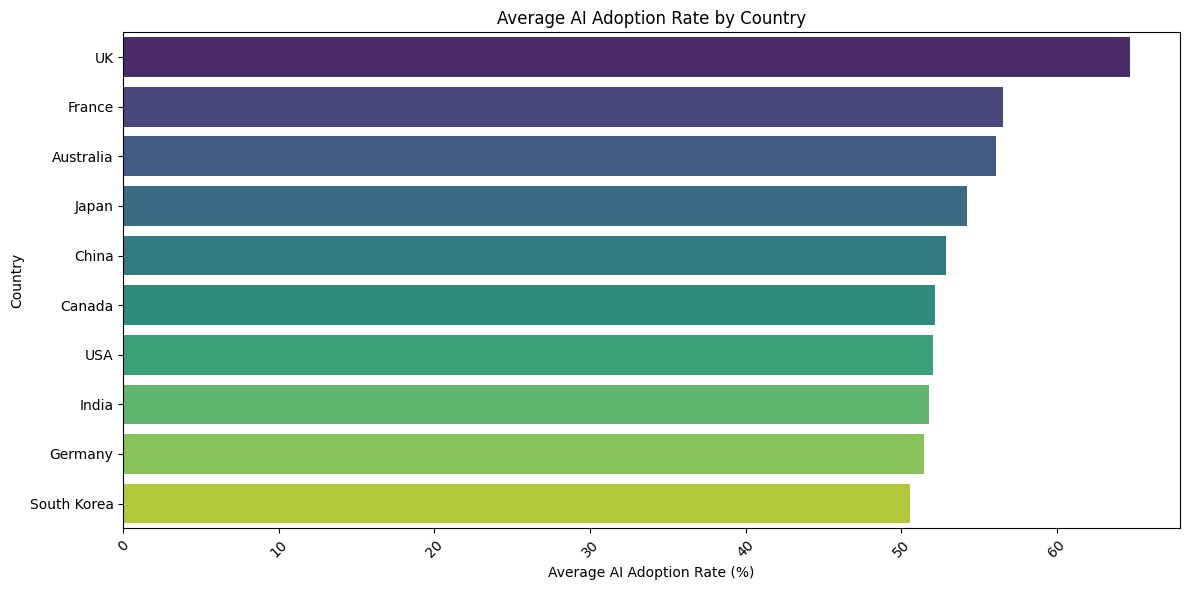

In [174]:

# Grouop by the 'Country' and calculate the mean AI Adoption Rate

country_ai_adoption = df.groupby('Country')['AI Adoption Rate (%)'].mean().reset_index()
country_ai_adoption = country_ai_adoption.sort_values(by='AI Adoption Rate (%)', ascending=False)

# Plotting the AI Adoption Rate by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='AI Adoption Rate (%)', y='Country', data=country_ai_adoption, palette='viridis')
plt.title('Average AI Adoption Rate by Country')
plt.xlabel('Average AI Adoption Rate (%)')
plt.ylabel('Country')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()




### Average AI Adoption Rate by Industry

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\2932585325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI Adoption Rate (%)', y='Industry', data=media_ai_adoption, palette='viridis')


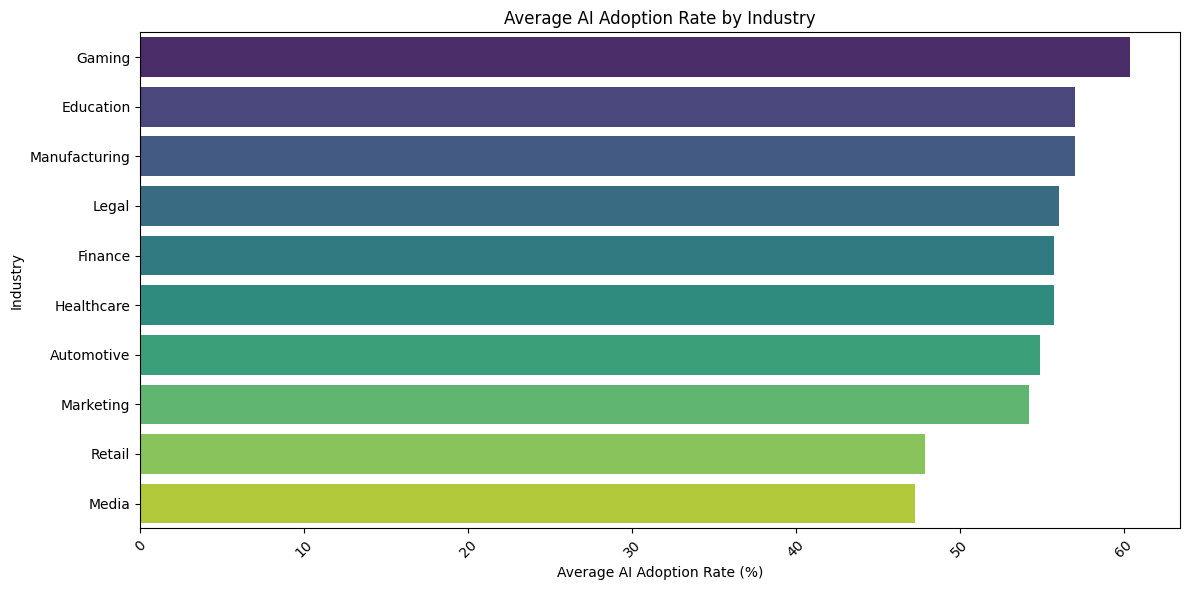

In [175]:
# AI Adoption Rate by Media Type
media_ai_adoption = df.groupby('Industry')['AI Adoption Rate (%)'].mean().reset_index()
media_ai_adoption = media_ai_adoption.sort_values(by='AI Adoption Rate (%)', ascending=False)

# Plotting the AI Adoption Rate by Media Type
plt.figure(figsize=(12, 6))
sns.barplot(x='AI Adoption Rate (%)', y='Industry', data=media_ai_adoption, palette='viridis')
plt.title('Average AI Adoption Rate by Industry')
plt.xlabel('Average AI Adoption Rate (%)')
plt.ylabel('Industry')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()


### AI Content Volume by Country

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\1471297563.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




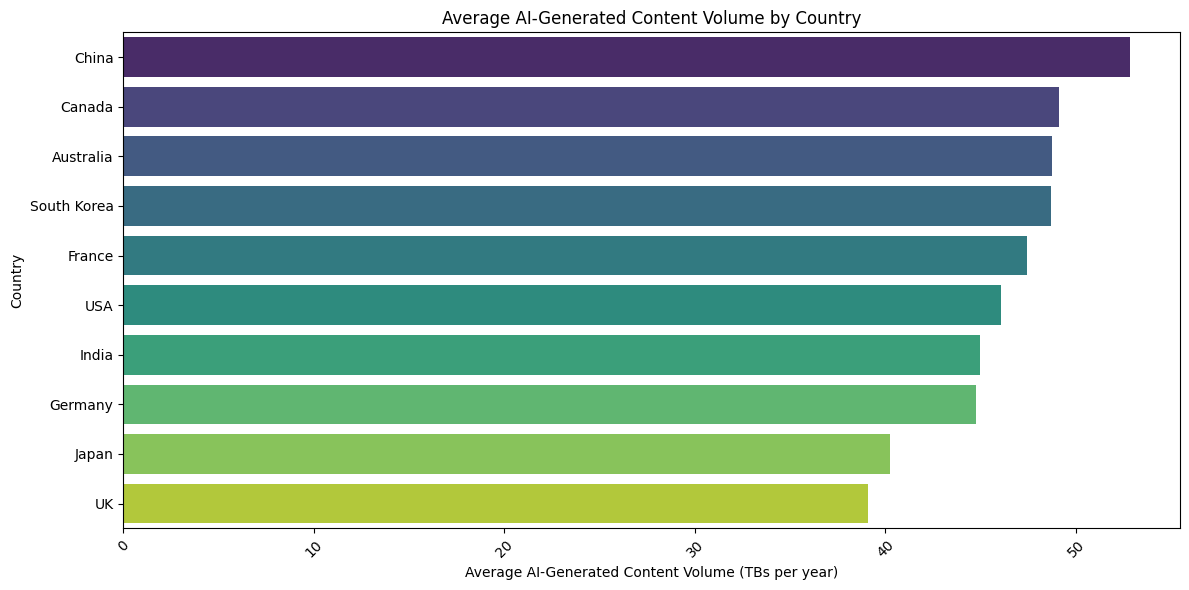

In [325]:
ai_content_volume = df.groupby('Country')['AI-Generated Content Volume (TBs per year)'].mean().reset_index()
ai_content_volume = ai_content_volume.sort_values(by='AI-Generated Content Volume (TBs per year)', ascending=False)

# Plotting the AI-Generated Content Volume by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='AI-Generated Content Volume (TBs per year)', y='Country', data=ai_content_volume, palette='viridis')
plt.title('Average AI-Generated Content Volume by Country')
plt.xlabel('Average AI-Generated Content Volume (TBs per year)')
plt.ylabel('Country')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

### AI Content Volume by Industry on Average

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\1396752128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI-Generated Content Volume (TBs per year)', y='Industry', data=ai_conent_by_industry, palette='viridis')


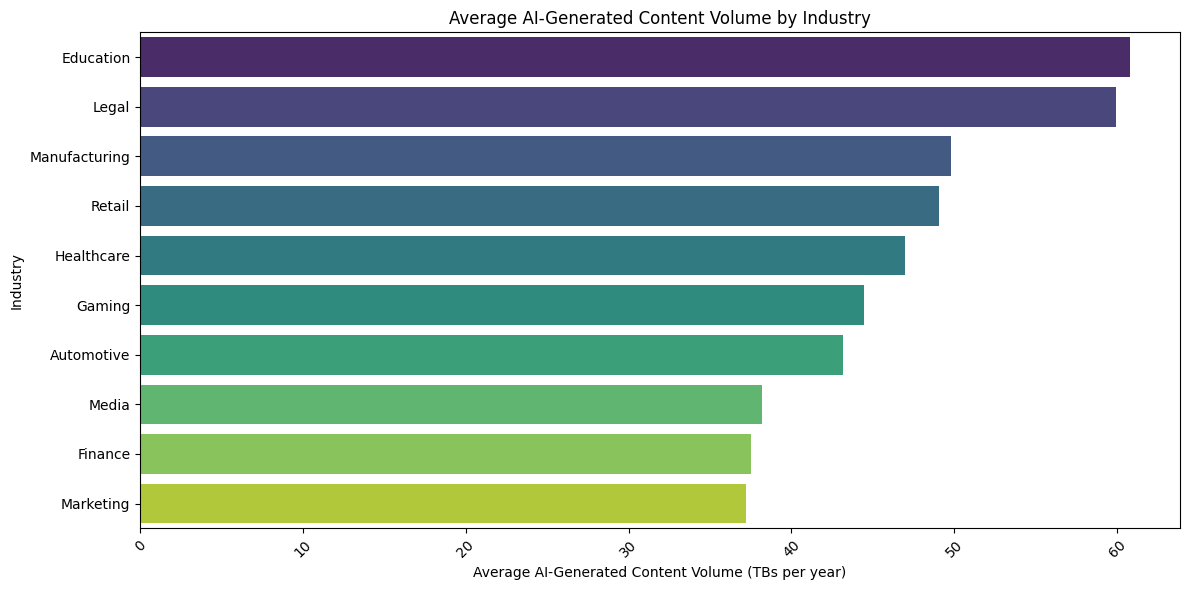

In [179]:
ai_conent_by_industry = df.groupby('Industry')['AI-Generated Content Volume (TBs per year)'].mean().reset_index()
ai_conent_by_industry = ai_conent_by_industry.sort_values(by='AI-Generated Content Volume (TBs per year)', ascending=False)

# Plotting the AI-Generated Content Volume by Industry
plt.figure(figsize=(12, 6))
sns.barplot(x='AI-Generated Content Volume (TBs per year)', y='Industry', data=ai_conent_by_industry, palette='viridis')
plt.title('Average AI-Generated Content Volume by Industry')
plt.xlabel('Average AI-Generated Content Volume (TBs per year)')
plt.ylabel('Industry')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

Education generated the most AI content, followed by Legal, Manufacturing, and Retail, whereas Finance and Marketing generated the least AI content. This might be because the some industries might have lately adopted AI leading to lower average AI adoption late over the years.

### Regulations Impact on AI Adoption 

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\2200710472.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI Adoption Rate (%)', y='Regulation Status', data=regulation_impact, palette='viridis')
C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\2200710472.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI-Generated Content Volume (TBs per year)', y='Regulation Status', data=regulation_impact, palette='viridis')


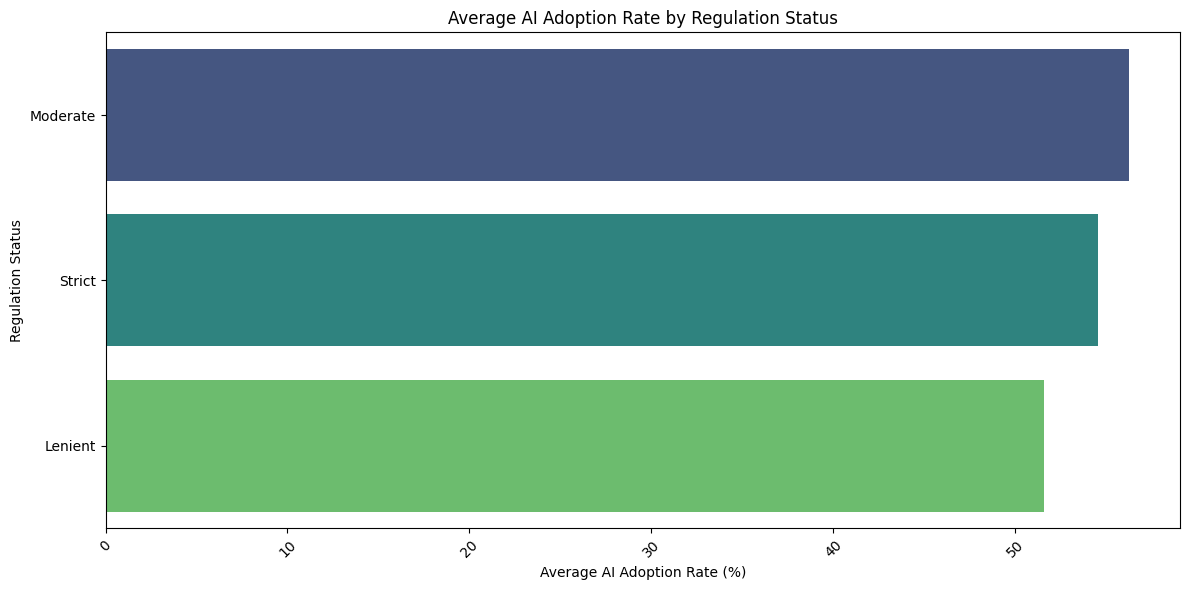

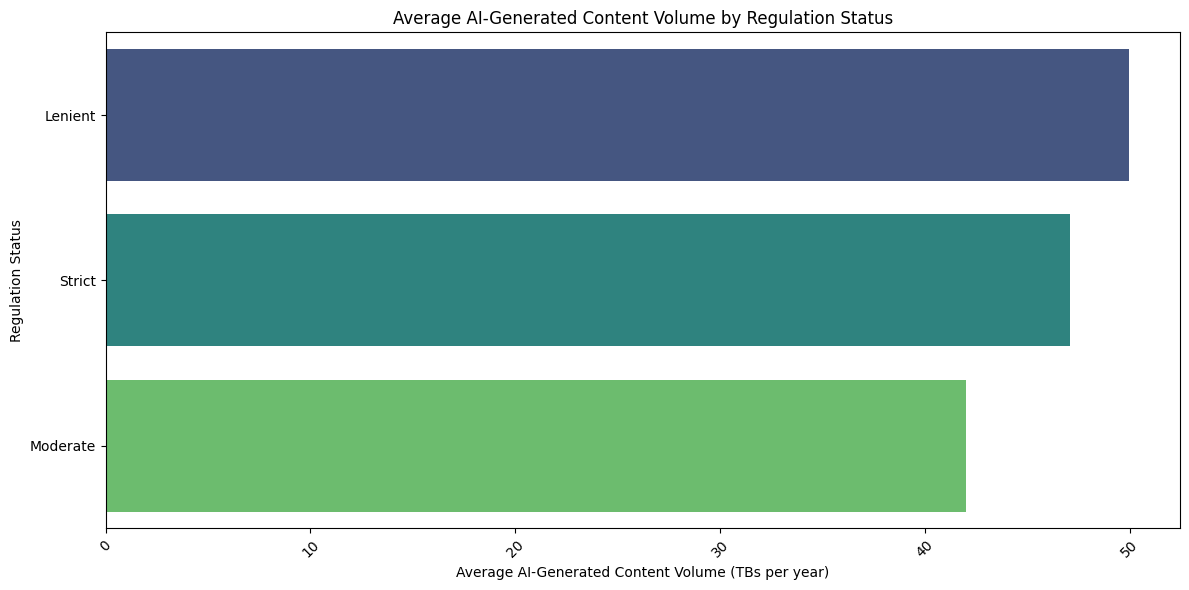

In [204]:
# Checking for the country with the highest regulation impact
regulation_impact = df.groupby('Regulation Status')['AI Adoption Rate (%)'].mean().reset_index()
regulation_impact = regulation_impact.sort_values(by='AI Adoption Rate (%)', ascending=False)

# Plotting the AI Adoption Rate by Regulation Status
plt.figure(figsize=(12, 6))
sns.barplot(x='AI Adoption Rate (%)', y='Regulation Status', data=regulation_impact, palette='viridis')
plt.title('Average AI Adoption Rate by Regulation Status')
plt.xlabel('Average AI Adoption Rate (%)')
plt.ylabel('Regulation Status')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Checking for the country with the highest regulation impact
regulation_impact = df.groupby('Regulation Status')['AI-Generated Content Volume (TBs per year)'].mean().reset_index()
regulation_impact = regulation_impact.sort_values(by='AI-Generated Content Volume (TBs per year)', ascending=False)

# Plotting the AI-Generated Content Volume by Regulation Status
plt.figure(figsize=(12, 6))
sns.barplot(x='AI-Generated Content Volume (TBs per year)', y='Regulation Status', data=regulation_impact, palette='viridis')
plt.title('Average AI-Generated Content Volume by Regulation Status')
plt.xlabel('Average AI-Generated Content Volume (TBs per year)')
plt.ylabel('Regulation Status')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

Regulations did not directly affect the AI adoption level. This maybe because, over the years, AI regulations have not been really harsh to prevent people from utilizing AI, especially for the LLMs, such as 'Bard' 'DALL-E' 'Stable Diffusion' 'Claude' 'Midjourney' 'ChatGPT'
 'Synthesia'

### AI Adoption Rate by Different Industries Over the Years

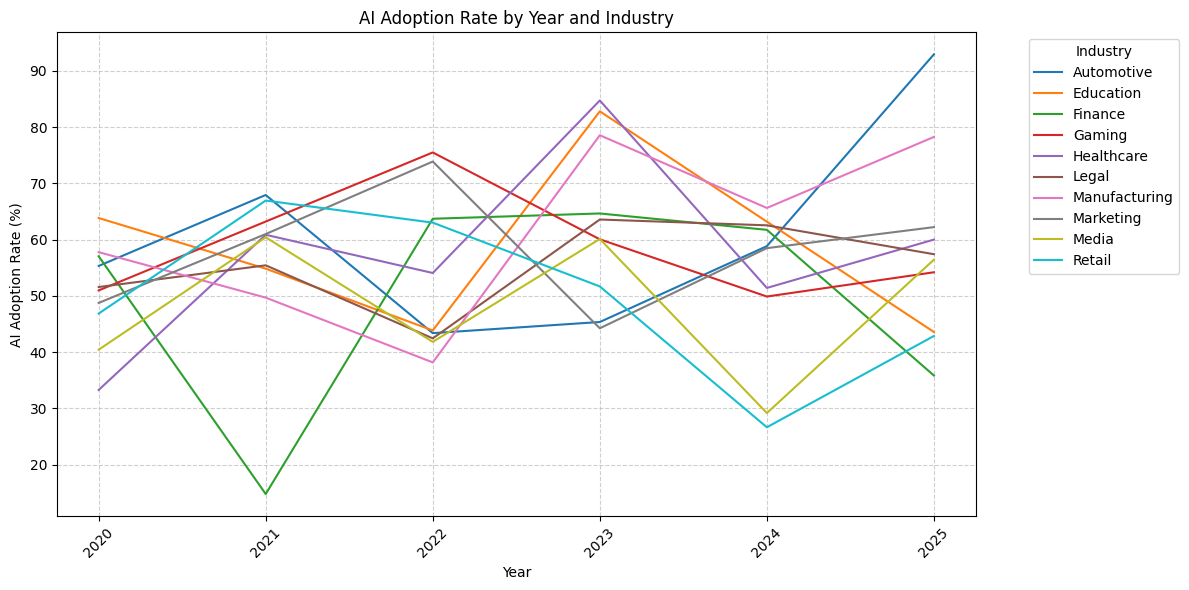

In [230]:
# AI adooption by industries over the years
ai_adoption_over_years = df.groupby(['Year', 'Industry'])['AI Adoption Rate (%)'].mean().reset_index()
ai_adoption_over_years = ai_adoption_over_years.sort_values(by='Year')

# Plotting the AI Adoption Rate by Year and Industry

plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.6)
sns.lineplot(x='Year', y='AI Adoption Rate (%)', hue='Industry', data=ai_adoption_over_years, palette='tab10')
plt.title('AI Adoption Rate by Year and Industry')
plt.xlabel('Year')
plt.ylabel('AI Adoption Rate (%)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Observing the chart, Automotive industry proves to have the most rising AI adoption over the years, especiallly from 2024 throughout. Conversely, AI adoption in educatoin is falling by about 30% (from approximately 82% to slightly above 40%) from the year 2023 throughout.

### AI adoption Rate by countries over the years

In [255]:
def plot_ai_adoption_by_countries(df, countries=None):
    """
    Plot AI adoption rate over the years for specified countries.
    """
    # Prepare the data
    ai_adoption = df.groupby(['Year', 'Country'])['AI Adoption Rate (%)'].mean().reset_index()
    ai_adoption = ai_adoption.sort_values(by='Year')
    
    # Filter for specific countries if provided
    try:
        if countries:
            if isinstance(countries, str):  # Handle single country string input
                countries = [countries]
            ai_adoption = ai_adoption[ai_adoption['Country'].isin(countries)]
    except Exception as e:
        print(f"Error filtering countries: {e}")
        return

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='AI Adoption Rate (%)', hue='Country', data=ai_adoption, palette='tab10')
    title = "AI Adoption Rate Over the Years"
    if countries:
        title += f" for {', '.join(countries)}" # Add countries to title, if provided by the user 
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('AI Adoption Rate (%)')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


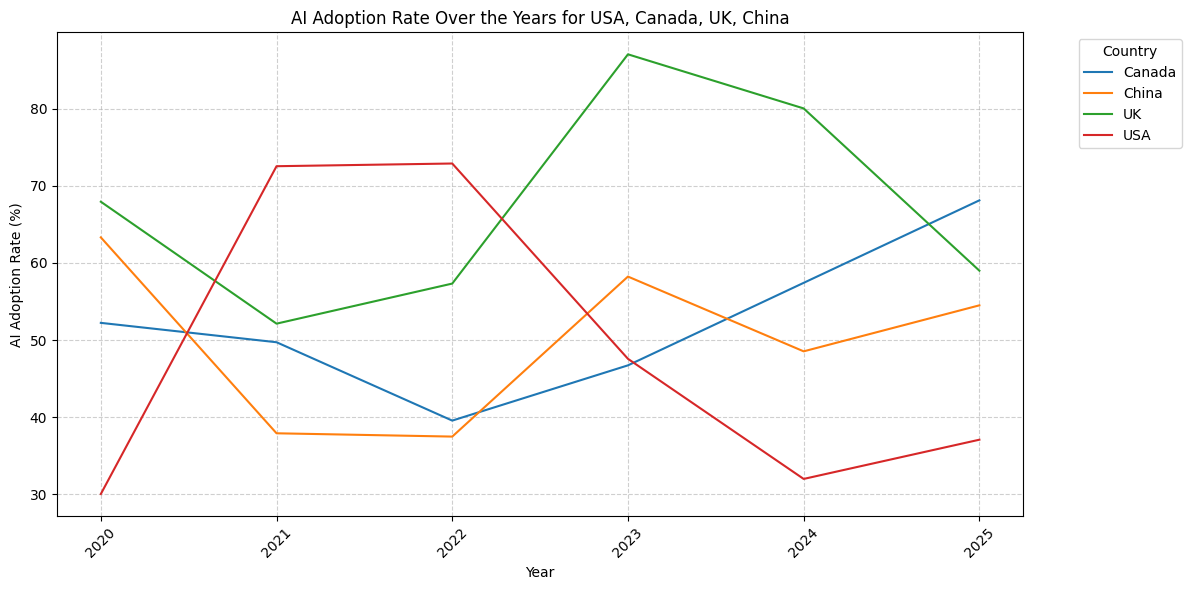

In [254]:

plot_ai_adoption_by_countries(df, ['USA', 'Canada', 'UK', 'China'])


Observing above graph, you can see some great shifts in AI adoption amongst countries. For instance, USA has had immense rise from 2020 through 2021, then constant from 2021 through 2022, and fell by about 30% from 2022 through 2024, but it shows some hope of starting to sligtly grow throughout 2024 onwards. 

Unlike USA, for Canada, there has been a slight deccline at the beginning, but from 2023 throughout, there is a great potential for AI adoption, and it proves to be consistent. 

### A Function to Directly Generate AI adooption Rate by industries in a Country over the years

In [265]:

def plot_country_ai_adoption(df, country_name):
    """
    Plots the AI Adoption Rate over the years by industry for a specific country.

    Parameters
    ----------
    df : pandas.DataFrame
        The input dataset containing AI adoption data.

    country_name : str
        The name of the country for which to plot AI adoption trends.

    Returns
    -------
    None
        Displays a line plot showing the average AI Adoption Rate by industry over time
        for the specified country.

    Example
    -------
    plot_country_ai_adoption(df, 'USA')
    """
    # Filter and prepare the data
    country_df = df[df['Country'] == country_name].groupby(['Year', 'Industry'])['AI Adoption Rate (%)'].mean().reset_index()
    country_df = country_df.sort_values(by='Year')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='AI Adoption Rate (%)', hue='Industry', data=country_df, palette='viridis')
    plt.title(f'AI Adoption Rate by Year and Industry in {country_name}')
    plt.xlabel('Year')
    plt.ylabel('AI Adoption Rate (%)')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



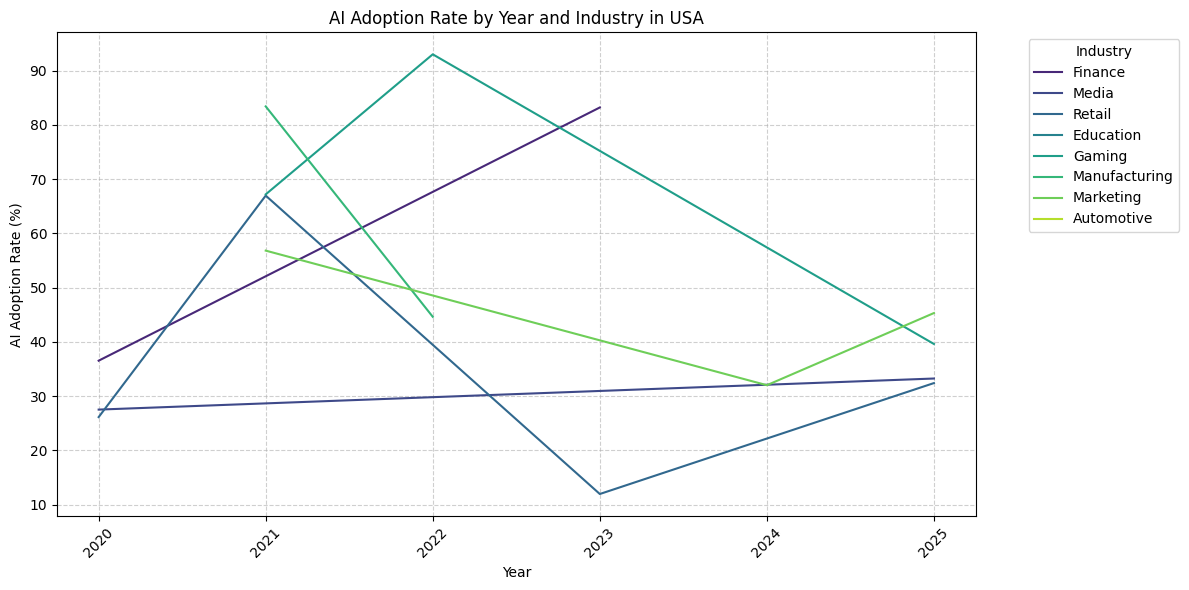

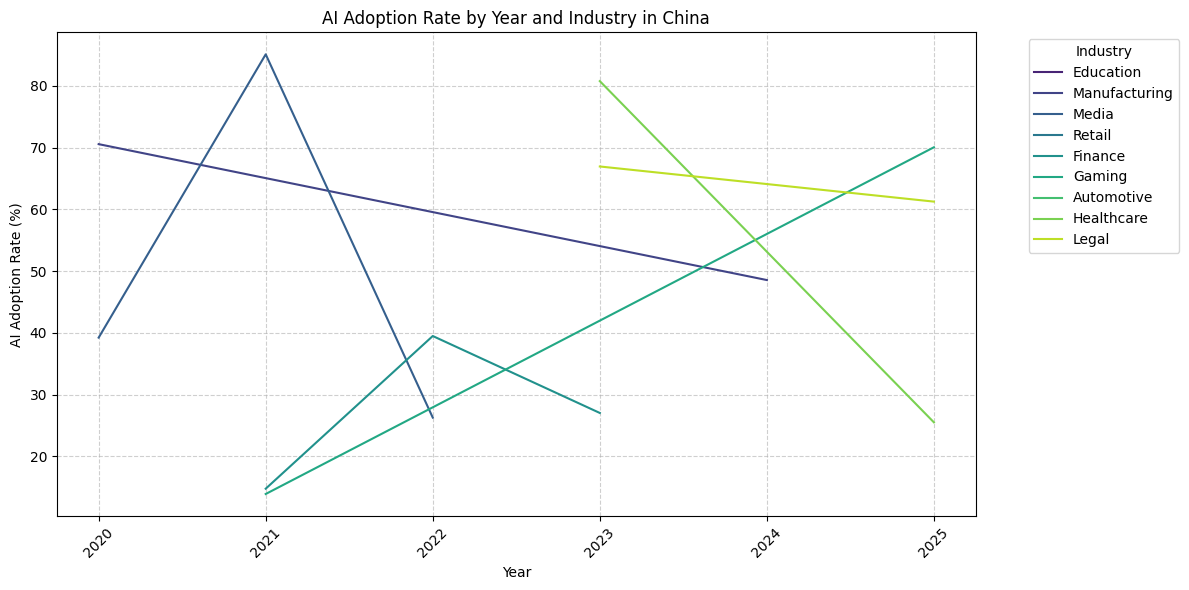

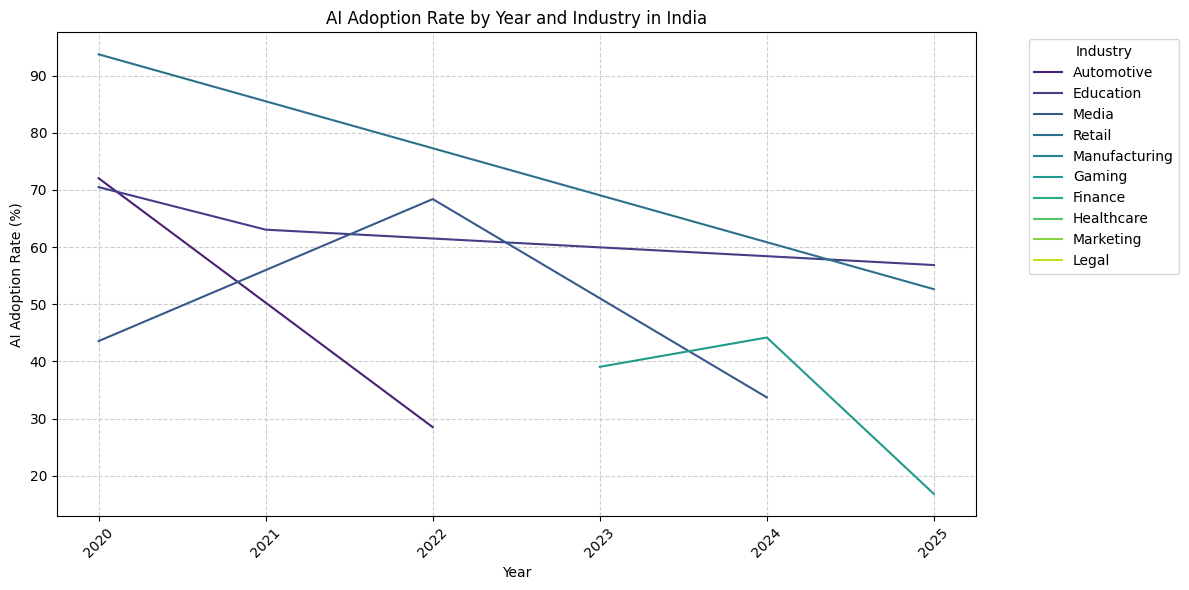

In [266]:
plot_country_ai_adoption(df, 'USA')
plot_country_ai_adoption(df, 'China')
plot_country_ai_adoption(df, 'India')


### Job Loss Due to AI (%) In industries over the years

In [ ]:
# Job Loss Due to AI (%) In industries over the years

def industry_jobloss(df, industries=None):
    """
    Plot job loss due to AI over the years for specified industries.

    Parameters:
    - df (DataFrame): The dataset to use.
    - industries (str or list of str, optional): Industry name(s) to filter. If None, plot for all industries.

    Usage:
    industry_jobloss(df, 'Gaming')  # Single industry
    industry_jobloss(df, ['Gaming', 'Healthcare'])  # Multiple industries
"""
    # Filter and prepare the data
    job_loss = df.groupby(['Year', 'Industry'])['Job Loss Due to AI (%)'].mean().reset_index()
    job_loss = job_loss.sort_values(by='Year')

    if industries:
        try: 
            if isinstance(industries, str): # Handle single industry string input
                industries = [industries]
            job_loss = job_loss[job_loss['Industry'].isin(industries)]
        except Exception as e:
            print(f"Error filtering industries: {e}")
            return
        
    # Plotting the job loss rate by year and industry
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Job Loss Due to AI (%)', hue='Industry', data=job_loss, palette='tab10')

    title = "Job Loss Due to AI Over the Years"
    if industries:
        title += f" for {', '.join(industries)}" # Add industries to title, if provided by the user
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Job Loss Due to AI (%)')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    

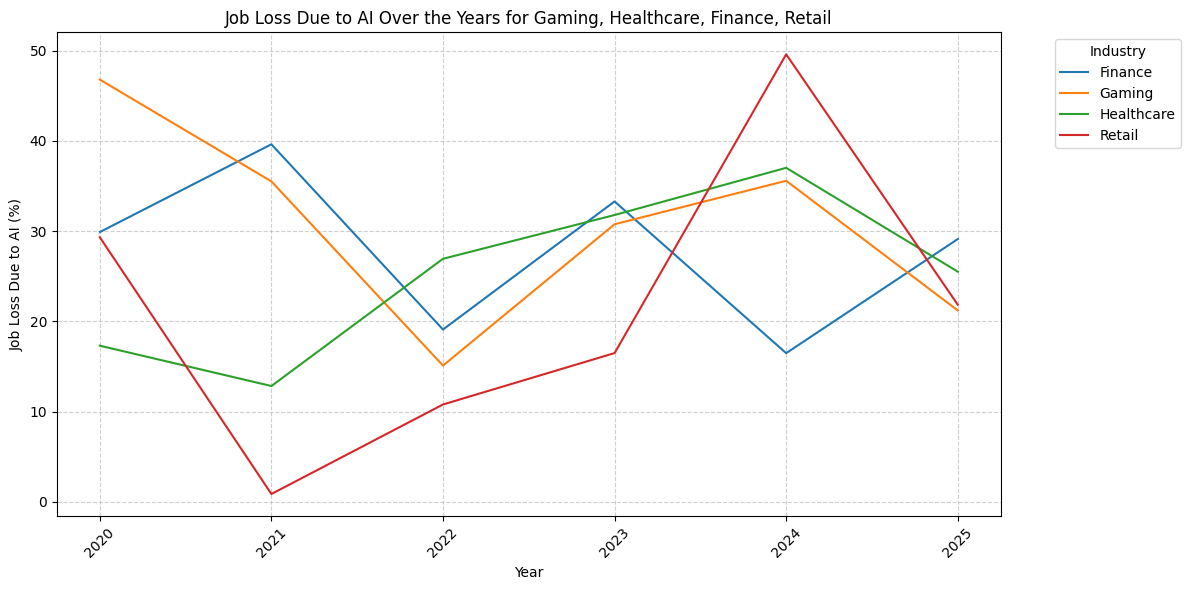

In [264]:
industry_jobloss(df, ['Gaming', 'Healthcare', 'Finance', 'Retail'])

### Plots job loss due to AI over the years for specified countries.


In [279]:
def country_jobloss(df, countries=None):
    """
    Plots job loss due to AI over the years for specified countries.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset containing columns ['Year', 'Country', 'Job Loss Due to AI (%)'].

    countries : str or list of str, optional
        Country name(s) to filter. If None, the function plots for all countries.

    Returns
    -------
    None
        Displays a line plot showing the average job loss due to AI by country over time.

    Example
    -------
    country_jobloss(df, 'UK')                # Single country
    country_jobloss(df, ['UK', 'USA'])       # Multiple countries
    country_jobloss(df)                      # All countries
    """
    # Group and prepare the data
    job_loss = df.groupby(['Year', 'Country'])['Job Loss Due to AI (%)'].mean().reset_index()
    job_loss = job_loss.sort_values(by='Year')

    # Filter for specific countries if provided
    if countries:
        if isinstance(countries, str):  # Convert single string to list
            countries = [countries]
        try:
            job_loss = job_loss[job_loss['Country'].isin(countries)]
        except Exception as e:
            print(f"Error filtering countries: {e}")
            return

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Job Loss Due to AI (%)', hue='Country', data=job_loss, palette='tab10')

    title = "Job Loss Due to AI Over the Years"
    if countries:
        title += f" for {', '.join(countries)}"
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Job Loss Due to AI (%)')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


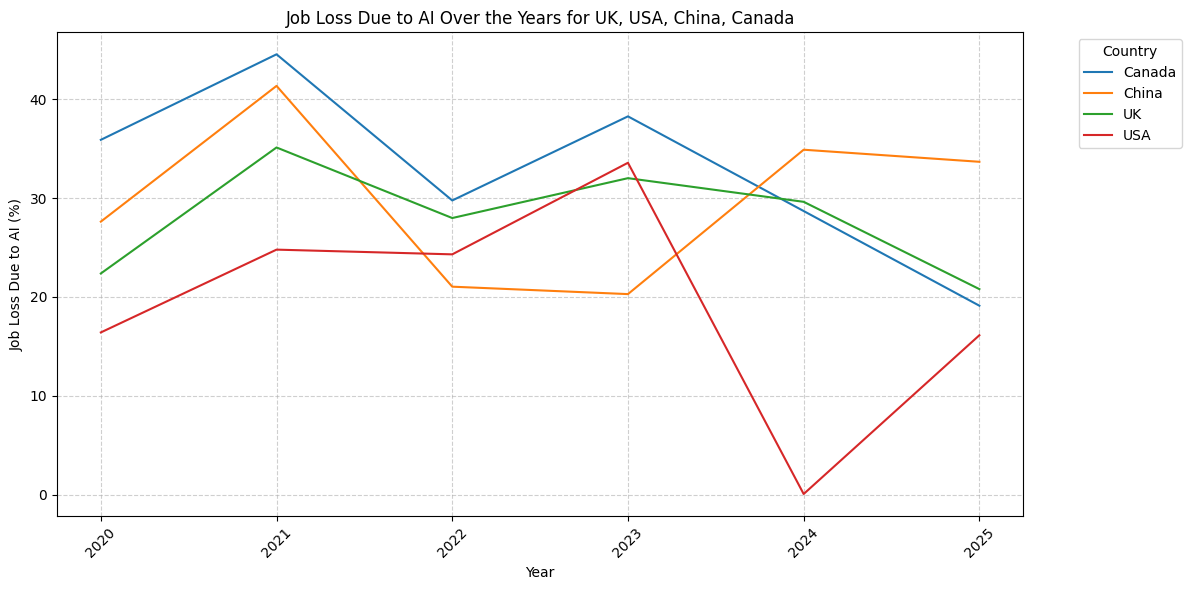

In [283]:
country_jobloss(df, ['UK', 'USA', 'China', 'Canada'])


JobLoss in Various Industries Analysed

### Revenue Increase Due to AI by Country

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\3228346592.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




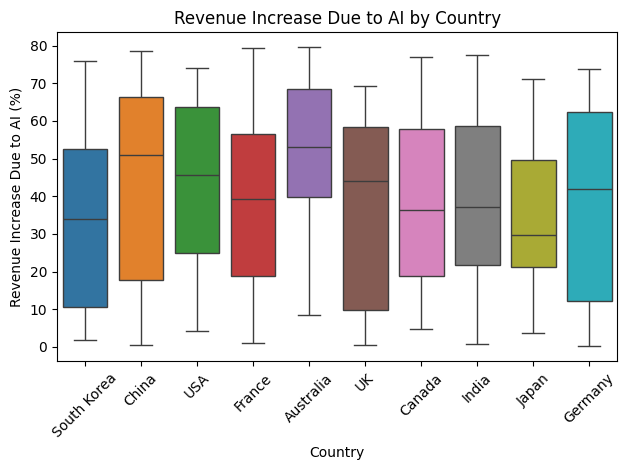

In [294]:
sns.boxplot(x='Country', y='Revenue Increase Due to AI (%)', data=df, palette='tab10')
plt.title('Revenue Increase Due to AI by Country')
plt.xlabel('Country')
plt.ylabel('Revenue Increase Due to AI (%)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

### Revenue Increase Due to AI by Industry

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\3874911621.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




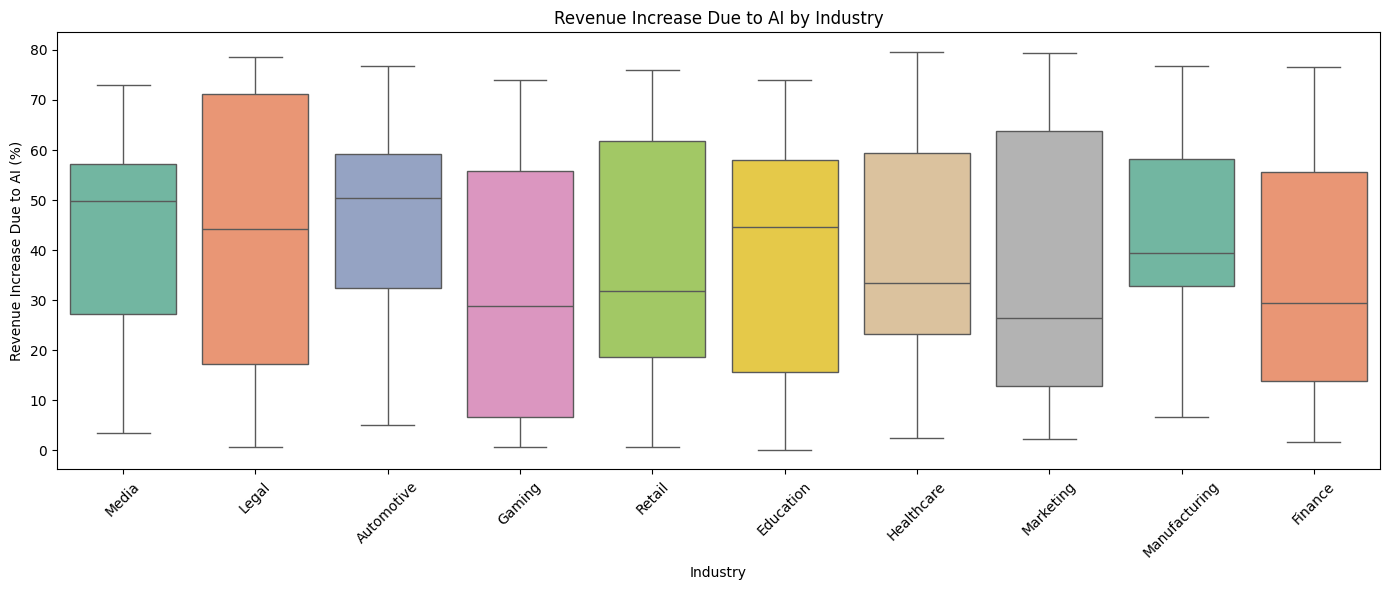

In [295]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Industry", y="Revenue Increase Due to AI (%)", palette='Set2')
plt.xticks(rotation=45)
plt.title("Revenue Increase Due to AI by Industry")
plt.tight_layout()
plt.show()

### Consumer Trust in AI by Countries Over Time

In [ ]:
# AI Consumer Trust by Countries

def plot_ai_consumer_trust(df, countries=None):
    """
    Plot AI consumer trust over the years for specified countries.

    Parameters:
    - df (DataFrame): The dataset to use.
    - countries (str or list of str, optional): Country name(s) to filter. If None, plot for all countries.

    Usage:
    plot_ai_consumer_trust(df, 'USA')  # Single country
    plot_ai_consumer_trust(df, ['USA', 'Canada'])  # Multiple countries
"""
    # Filter and prepare the data
    consumer_trust = df.groupby(['Year', 'Country'])['Consumer Trust in AI (%)'].mean().reset_index()
    consumer_trust = consumer_trust.sort_values(by='Year')

    if countries:
        try: 
            if isinstance(countries, str): # Handle single country string input
                countries = [countries]
            consumer_trust = consumer_trust[consumer_trust['Country'].isin(countries)]
        except Exception as e:
            print(f"Error filtering countries: {e}")
            return
        
    # Plotting the consumer trust rate by year and country
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Consumer Trust in AI (%)', hue='Country', data=consumer_trust, palette='tab10')

    title = "AI Consumer Trust Over the Years"
    if countries:
        title += f" for {', '.join(countries)}" # Add countries to title, if provided by the user
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Consumer Trust in AI (%)')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)

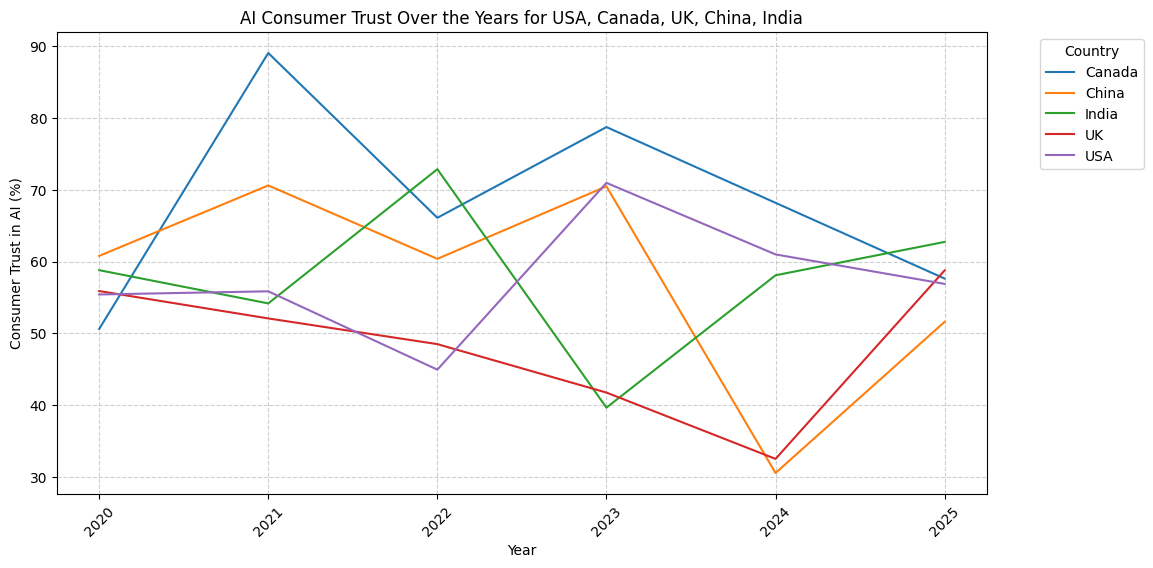

In [300]:
plot_ai_consumer_trust(df, ['USA', 'Canada', 'UK', 'China', 'India'])

### AI Consumer Trust Over Time Across Various Inudstries Over Time

In [316]:
# AI Consumer Trust by Industries

def plot_ai_consumer_trust_by_industry(df, industries=None):
    """
    Plot AI consumer trust over the years for specified industries.

    Parameters:
    - df (DataFrame): The dataset to use.
    - industries (str or list of str, optional): Industry name(s) to filter. If None, plot for all industries.

    Usage:
    plot_ai_consumer_trust_by_industry(df, 'Gaming')  # Single industry
    plot_ai_consumer_trust_by_industry(df, ['Gaming', 'Healthcare'])  # Multiple industries
"""
    # Filter and prepare the data
    consumer_trust = df.groupby(['Year', 'Industry'])['Consumer Trust in AI (%)'].mean().reset_index()
    consumer_trust = consumer_trust.sort_values(by='Year')

    if industries:
        try: 
            if isinstance(industries, str): # Handle single industry string input
                industries = [industries]
            consumer_trust = consumer_trust[consumer_trust['Industry'].isin(industries)]
        except Exception as e:
            print(f"Error filtering industries: {e}")
            return
        
    # Plotting the consumer trust rate by year and industry
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Consumer Trust in AI (%)', hue='Industry', data=consumer_trust, palette='tab10')

    title = "AI Consumer Trust Over the Years"
    if industries:
        title += f" for {', '.join(industries)}" # Add industries to title, if provided by the user
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Consumer Trust in AI (%)')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)

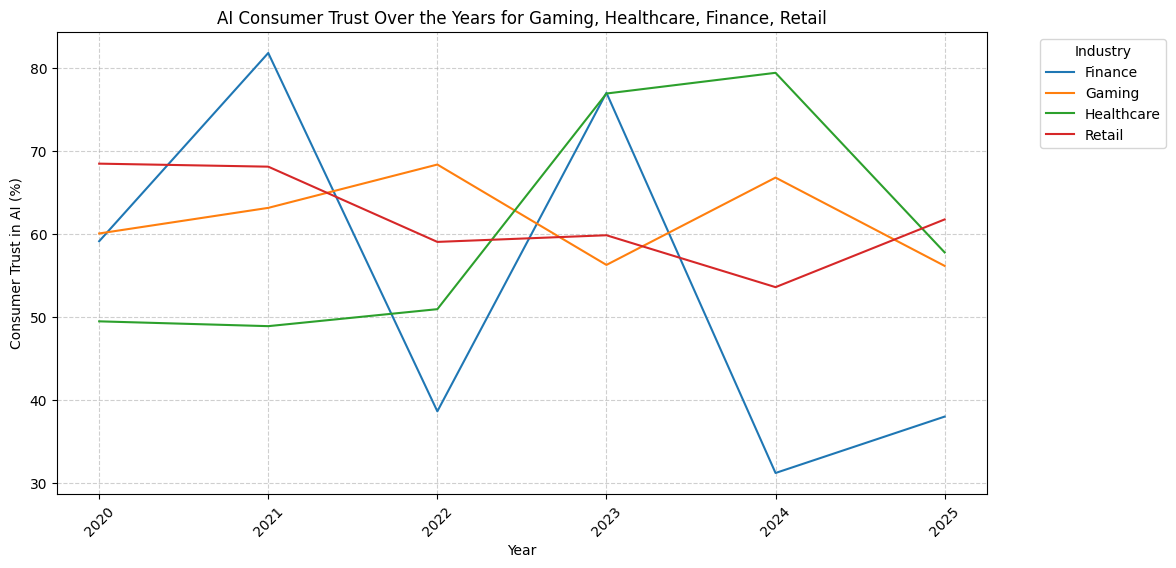

In [317]:
# AI Consumer Trust by Industries
plot_ai_consumer_trust_by_industry(df, ['Gaming', 'Healthcare', 'Finance', 'Retail'])